#  Course project Module 4 part 2 for Machine Learning

### Build an image classifier


### EPFL Extension School                                 

####  Data source : CIFAR                                
####  By Joker
- started: 15.09.2019
- finished: 25.09.2019

# 01 Data exploration

## The goal of this project is to:

build an image classifier using the models and techniques that we saw during this course. We will use a subset of the CIFAR-10 data set with four categories: trucks, cars, airplanes, and ships. We provide a train set with 5,000 images and their labels, and a test set with 1,000 images. The goal is to train and evaluate different models using the train set and make predictions for the pictures of the test set.

## A quick look at the data:

We provide a cifar4-train.npz file with the data for the 5,000 train images. This .npz archive contains the following arrays.

## Perform the following tasks

- Print the class distribution.
- Give the accuracy of the "most-frequent" baseline.
- Plot a few images from the data set.

### Using the high-level OverFeat features

- Create a scree plot as described.
- Give the cumulated PVE of the first two principal components.
- Compute the number of components to retain 80%, 90%, 95% and 99% of the cumulated PVE.
- Create a 2d plot of the data as described. Write your observations.

### Using the matrix of pixels

- Create a 2d plot of the data as described. Write your observations.

# Data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# Loading data under .npz format
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    cifar4 = dict(npz_file.items())
# Get data keys
print('Data loaded', '\nIt is a dictionary with keys:', list(cifar4.keys()))

Data loaded 
It is a dictionary with keys: ['pixels', 'overfeat', 'labels', 'names', 'allow_pickle']


In [3]:
# Generate the features matrices with pixels and overfeat
Xp = cifar4['pixels']
Xo = cifar4['overfeat']
y = cifar4['labels']
names = cifar4['names']

# Explore data
print('Xp shape:', Xp.shape, 'Xp dtype:', Xp.dtype,
      '\nXo shape:', Xo.shape,'Xo dtype:', Xo.dtype,
      '\n y shape:', y.shape,'y dtype:', y.dtype,
      '\nnames:', names)

Xp shape: (5000, 3072) Xp dtype: uint8 
Xo shape: (5000, 4096) Xo dtype: float32 
 y shape: (5000,) y dtype: int64 
names: ['truck' 'car' 'airplane' 'ship']


# Class distribution

In [4]:
# Check classes distribution
print(pd.value_counts(y, ascending=False, normalize=True),
      '\n\nThe data set is well balanced. This will allows good models creation')

3    0.25
2    0.25
1    0.25
0    0.25
dtype: float64 

The data set is well balanced. This will allows good models creation


# Accuracy of the "most-frequent" baseline

In [5]:
# Split data
X_tr, X_te, y_tr, y_te = train_test_split(
    Xp, y, test_size=0.3, random_state=0)
# Create the dummy classifier
dummy = DummyClassifier(strategy='most_frequent')
# Fit it
dummy.fit(X_tr, y_tr)

# Compute test accuracy
accuracy = dummy.score(X_te, y_te)
print('Baseline Accuracy is: {:.3f}'.format(accuracy),
      '\nMy models must perform better than the Baseline to be effective')

Baseline Accuracy is: 0.228 
My models must perform better than the Baseline to be effective


# Image plot

In [1]:
def DisplayIma(k):
    idx = (y == k)
    fig, axes = plt.subplots(1, 10, figsize=(17, 2))
    for i,axis in enumerate(axes):
        flat_img = Xp[idx][i,:]
        img = flat_img.reshape(32, 32, 3)
        axis.imshow(img)
        axis.get_xaxis().set_visible(False) 
        axis.get_yaxis().set_visible(False)
    plt.show()
    
for k in range(4):
    DisplayIma(k)

NameError: name 'y' is not defined

# Scree plot

In [82]:
# Use PCA to visualise high-dimensional data sets
# Create PCA transformer
pca = PCA(n_components=1500)
# Apply PCA on overfeat
pca.fit(Xo)
# Get explained variance
pve=pca.explained_variance_ratio_

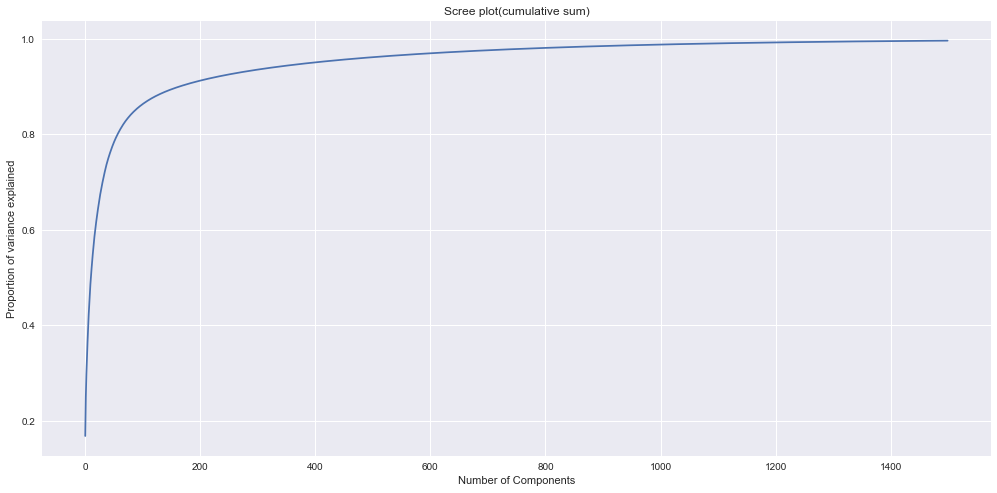

In [83]:
# Scree plot
sns.set()
fig = plt.figure(figsize=(17, 8))
plt.plot(np.cumsum(pve))
plt.xlabel('Number of Components')
plt.ylabel('Proportion of variance explained')
plt.title('Scree plot(cumulative sum)')
plt.show()

In [126]:
#Store cumulative sum in a df
df_cum = pd.DataFrame.from_items([('cumsum', np.cumsum(pve))]).round(3)

# Select particular values of variance # What's the Pythonistic way doing it ?
eighty=df_cum.index[df_cum['cumsum']==0.80].tolist()[0]
ninety=df_cum.index[df_cum['cumsum']==0.90].tolist()[0]
ninetyfive=df_cum.index[df_cum['cumsum']==0.950].tolist()[0]
ninetynine=df_cum.index[df_cum['cumsum']==0.990].tolist()[0]

print('{} components can explain {}% of the variance'.format(eighty, '80'),
     '\n{} components can explain {}% of the variance'.format(ninety, '90'),
     '\n{} components can explain {}% of the variance'.format(ninetyfive, '95'),
     '\n{} components can explain {}% of the variance'.format(ninetynine, '99'),)

56 components can explain 80% of the variance 
162 components can explain 90% of the variance 
387 components can explain 95% of the variance 
1037 components can explain 99% of the variance


# Overfeat PCA 2D

In [134]:
# Reducing features dimension to two using PCA
pca_o = PCA(n_components = 2)
pca_o.fit(Xo)
Xo_2d = pca_o.transform(Xo)

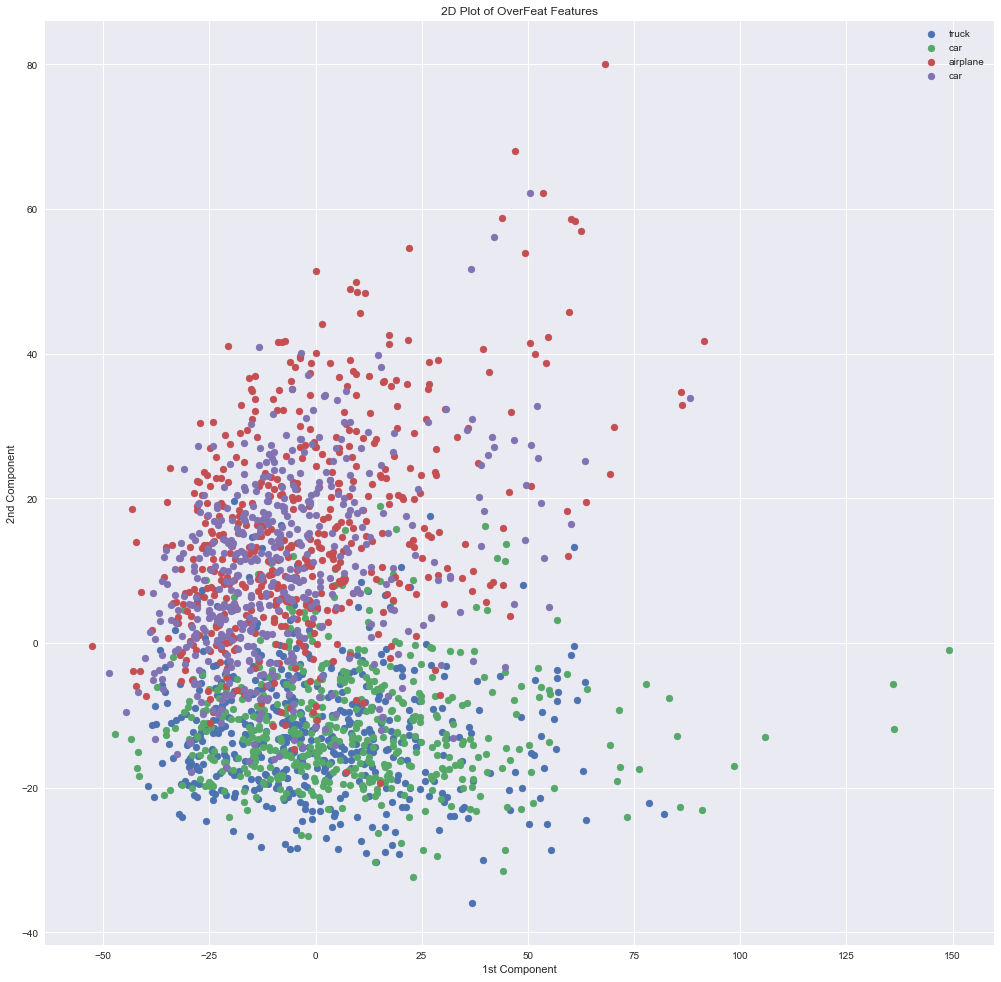

In [135]:
# Plot data under principal components
fig = plt.figure(figsize=(17, 17))

for i in range(len(names)):
    idx = (y == i)
    plot_0, plot_1= Xo_2d[idx, 0], Xo_2d[idx, 1]
    plt.scatter(plot_0[:500],
    plot_1[:500],
    label = names[y[i]])
    
plt.legend()
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.title('2D Plot of OverFeat Features')
plt.show()

I see like two group of two clusters overlaped.

# Pixels PCA 2D

In [131]:
# Reducing features dimension to two using PCA
pca_p = PCA(n_components = 2)
pca_p.fit(Xp)
Xp_2d = pca_p.transform(Xp)

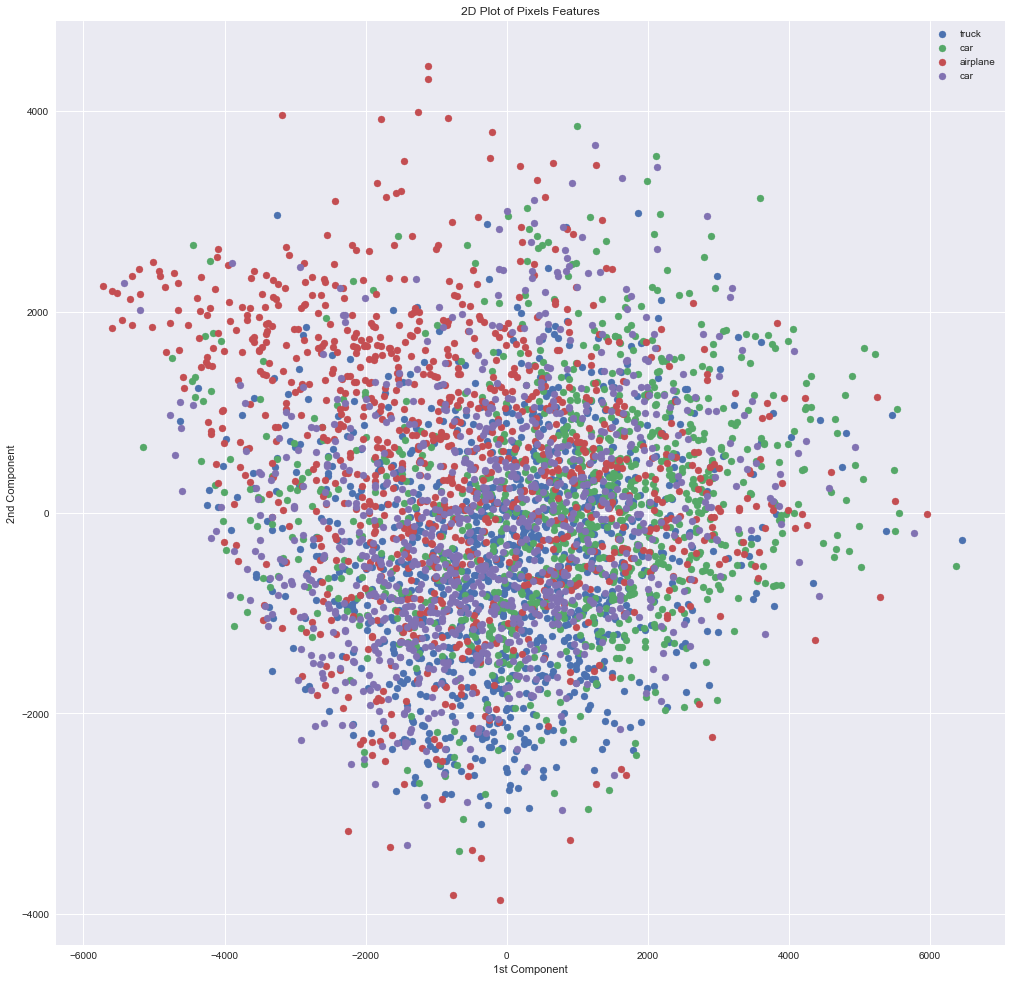

In [136]:
# Plot data under principal components
fig = plt.figure(figsize=(17, 17))

for i in range(len(names)):
    idx = (y == i)
    plot_0, plot_1= Xp_2d[idx, 0], Xp_2d[idx, 1]
    plt.scatter(plot_0[:1000],
    plot_1[:1000],
    label = names[y[i]])
    
plt.legend()
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.title('2D Plot of Pixels Features')
plt.show()

Clusters are well overlaped with pixels images.